# 02b - Training Results

## I. Preliminaries

Import the libraries and functions for TODO.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from matplotlib.patches import Ellipse
import torch
import yaml
import pickle

from metaboDGD.src import model
from metaboDGD.util import train
from metaboDGD.src.latent import RepresentationLayer
plt.rcParams["font.family"] = 'Arial'

In [9]:
f = open('sept_outputs/results.pkl', 'rb')
results = pickle.load(f)
f.close()

np_normal_lbls = results['np_normal_lbls']
np_normal_log = results['np_normal_log']
cohorts_normal = results['cohorts_normal']

np_tumor_lbls = results['np_tumor_lbls']
np_tumor_log = results['np_tumor_log']
cohorts_tumor = results['cohorts_tumor']

np_raw_normal_lbls = results['np_raw_normal_lbls']
np_raw_tumor_lbls = results['np_raw_tumor_lbls']

history = results['history']
cm = results['cm']

In [10]:
config_model = yaml.safe_load(open('model.yaml', 'r'))
config_train = yaml.safe_load(open('train.yaml', 'r'))

dgd_final = model.MetaboDGD(**config_model)
dgd_final.dec.load_state_dict(torch.load('sept_outputs/torch_outputs_dec.pt'))
dgd_final.gmm.load_state_dict(torch.load('sept_outputs/torch_outputs_gmm.pt'))

train_rep_final = RepresentationLayer(values=torch.zeros(size=(np_normal_log.shape[0], dgd_final.gmm.dim)))
train_rep_final.load_state_dict(torch.load('sept_outputs/torch_outputs_train_rep.pt'))

<All keys matched successfully>

In [11]:
f = open('sept_outputs/tumor_results.pkl', 'rb')
tumor_results = pickle.load(f)
f.close()

tumor_rep_final = tumor_results['tumor_rep_final']
dec_out_final   = tumor_results['dec_out_final']

## II. Training Curves

Get the training and validation loss, and clustering accuracy curves after training the model.

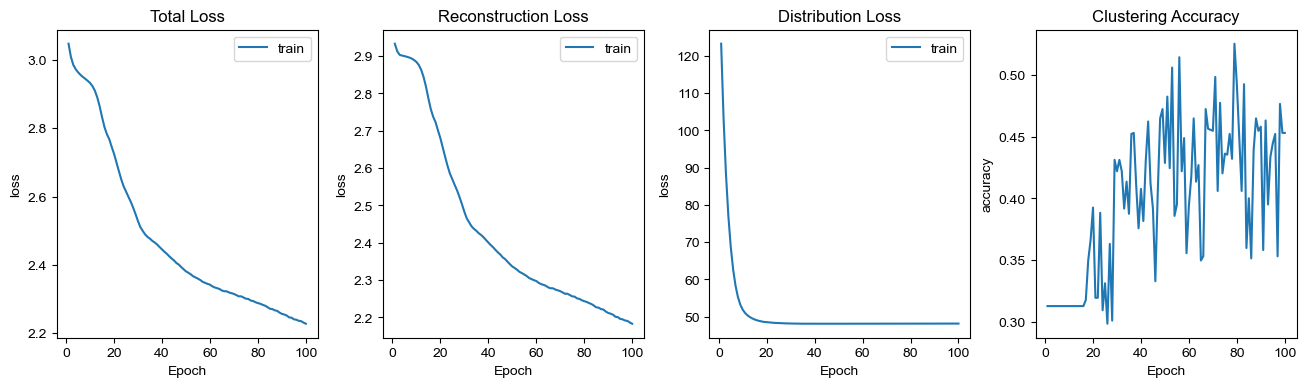

In [12]:
train.get_history_plot(history, inc_gmm_acc=True, with_val_plot=False)

## III. PCA Plots

In [13]:
pca_labels = {
        "BRCA1": 'Breast (BRCA1)',
        "CCRCC3": 'Kidney (ccRCC3)',
        "CCRCC4": 'Kidney (ccRCC4)',
        "COAD": 'Colon (COAD)',
        "GBM": 'Brain (GBM)',
        "HurthleCC": 'Thyroid (HurthleCC)',
        "PDAC": 'Pancreas (PDAC)',
        "PRAD": 'Prostate (PRAD)',
        "feces_MTBLS6334": 'Feces',
        "feces_MTBLS7866": 'Feces',
        "plasma_MTBLS11094": 'Plasma',
        "plasma_MTBLS11746": 'Plasma',
        "plasma_MTBLS11656": 'Plasma',
        "plasma_MTBLS3305":  'Plasma',
        "plasma_MTBLS8390":  'Plasma',
        "plasma_MTBLS1183":  'Plasma',
        "plasma_MTBLS2262":  'Plasma',
        "plasma_MTBLS11996": 'Plasma',
        "saliva_MTBLS4569": 'Saliva',
        "saliva_MTBLS7807": 'Saliva',
        "saliva_MTBLS760":  'Saliva',
        "serum_MTBLS12539": 'Serum',
        "serum_MTBLS12576": 'Serum',
        "serum_MTBLS8644":  'Serum',
        "serum_MTBLS7878":  'Serum',
        "serum_MTBLS6982":  'Serum',
        "serum_MTBLS2615":  'Serum',
        "serum_MTBLS1839":  'Serum',
        "serum_MTBLS12328": 'Serum',
        "serum_MTBLS6039":  'Serum',
        "serum_MTBLS3838":  'Serum',
        "tissue_MTBLS1122": 'Tissue'
    }

pca_markers = {
        "BRCA1": 'D',
        "CCRCC3": 'o',
        "CCRCC4": 'o',
        "COAD": '^',
        "GBM": 'D',
        "HurthleCC": 'o',
        "PDAC": 'D',
        "PRAD": 'D',
        "feces_MTBLS6334":  'o',
        "feces_MTBLS7866":  'o',
        "plasma_MTBLS11094":'o',
        "plasma_MTBLS11746":'s',
        "plasma_MTBLS11656":'o',
        "plasma_MTBLS3305": 'o',
        "plasma_MTBLS8390": 'o',
        "plasma_MTBLS1183": 'o',
        "plasma_MTBLS2262": 'o',
        "plasma_MTBLS11996":'o',
        "saliva_MTBLS4569": 'o',
        "saliva_MTBLS7807": 'o',
        "saliva_MTBLS760":  'o',
        "serum_MTBLS12539": 'o',
        "serum_MTBLS12576": 'o',
        "serum_MTBLS8644":  'o',
        "serum_MTBLS7878":  'o',
        "serum_MTBLS6982":  's',
        "serum_MTBLS2615":  'o',
        "serum_MTBLS1839":  'o',
        "serum_MTBLS12328": 'o',
        "serum_MTBLS6039":  'o',
        "serum_MTBLS3838":  'o',
        "tissue_MTBLS1122": 'o',
    }

### Normal Representations in Latent Space

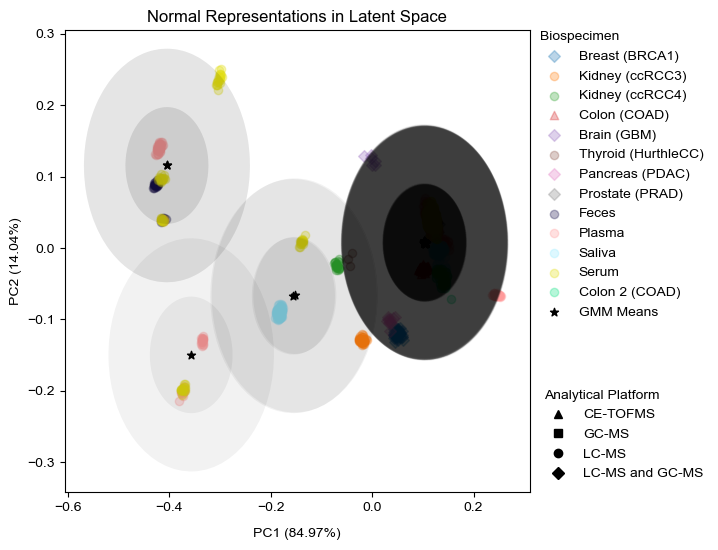

In [14]:
from collections import Counter
# from umap import UMAP

pca_counter = Counter(np_raw_normal_lbls)
means_and_reps = np.vstack((train_rep_final.z.detach().numpy(),dgd_final.gmm.means.detach().numpy()))

pca = PCA(n_components=2)
pca_fit = pca.fit_transform(means_and_reps)

# pca = UMAP(n_components=2)
# pca_fit = pca.fit_transform(means_and_reps)

fig, ax = plt.subplots(figsize=(6,6))

i = 0
j = 0
idx_fe = np.r_[224:257]
idx_pl = np.r_[257:654]
idx_sa = np.r_[654:843]
idx_se = np.r_[843:1153]
idx_ti = np.r_[1153:1192]
for c in cohorts_normal:
    k = pca_counter[c]
    j += k
    if ('plasma' not in c) and ('serum' not in c) and ('feces' not in c) and ('saliva' not in c) and ('tissue' not in c):
        ax.scatter(pca_fit[i:j,0], pca_fit[i:j,1], label=pca_labels[c], alpha=0.3, marker=pca_markers[c])
    # elif 'feces' in c:
    #     ax.scatter(pca_fit[i:j,0], pca_fit[i:j,1], label='Feces', alpha=0.3, marker=pca_markers[c], c="#17104B")
    # elif 'plasma' in c:
    #     ax.scatter(pca_fit[i:j,0], pca_fit[i:j,1], label='Plasma', alpha=0.3, marker=pca_markers[c], c="#FF9B9B")
    # elif 'saliva' in c:
    #     ax.scatter(pca_fit[i:j,0], pca_fit[i:j,1], label='Serum' , alpha=0.3, marker=pca_markers[c], c="#94EBFF")
    # elif 'serum' in c:
    #     ax.scatter(pca_fit[i:j,0], pca_fit[i:j,1], label='Serum' , alpha=0.3, marker=pca_markers[c], c="#E2DE0F")
    # elif 'tissue' in c:
    #     ax.scatter(pca_fit[i:j,0], pca_fit[i:j,1], label='Colon 2 (COAD)' , alpha=0.3, marker=pca_markers[c], c="#E2DE0F")
    i = j

ax.scatter(pca_fit[idx_fe,0], pca_fit[idx_fe,1], label='Feces'  , alpha=0.3, c="#17104B")
ax.scatter(pca_fit[idx_pl,0], pca_fit[idx_pl,1], label='Plasma' , alpha=0.3, c="#FF9B9B")
ax.scatter(pca_fit[idx_sa,0], pca_fit[idx_sa,1], label='Saliva' , alpha=0.3, c="#94EBFF")
ax.scatter(pca_fit[idx_se,0], pca_fit[idx_se,1], label='Serum'  , alpha=0.3, c="#e2de0f")
ax.scatter(pca_fit[idx_ti,0], pca_fit[idx_ti,1], label='Colon 2 (COAD)' , alpha=0.3, c="#0fe283")

ax.scatter(pca_fit[1192:,0], pca_fit[1192:,1], label='GMM Means', c='black', marker='*')
ax.set_title('Normal Representations in Latent Space')

P = pca.components_
for x in range(0, dgd_final.gmm.n_comp):
    cov_2d = np.diag(torch.exp(dgd_final.gmm.log_var).detach().numpy()[x])
    # print(cov_2d)
    mean_2d = P @ (dgd_final.gmm.means.detach().numpy()[x] - pca.mean_)
    # mean_2d = pca_fit[175+x]
    cov_2d_projected = P @ cov_2d @ P.T

    vals, vecs = np.linalg.eigh(cov_2d_projected)
    order = vals.argsort()[::-1]
    vals, vecs = vals[order], vecs[:, order]
    angle = np.degrees(np.arctan2(vecs[1, 0], vecs[0, 0]))
    
    std = 1.0
    w, h = 2 * std * np.sqrt(vals)
    ellipse = Ellipse(xy=mean_2d, width=w, height=h, angle=angle,
                    facecolor='black', alpha=0.05)
    ax.add_patch(ellipse)

    std = 2.0
    w, h = 2 * std * np.sqrt(vals)
    ellipse_2 = Ellipse(xy=mean_2d, width=w, height=h, angle=angle,
                    facecolor='black', alpha=0.05)
    ax.add_patch(ellipse_2)


ap_handles = [
    plt.Line2D([],[], color='black', marker='^', linestyle='None', label='CE-TOFMS'),
    plt.Line2D([],[], color='black', marker='s', linestyle='None', label='GC-MS'),
    plt.Line2D([],[], color='black', marker='o', linestyle='None', label='LC-MS'),
    plt.Line2D([],[], color='black', marker='D', linestyle='None', label='LC-MS and GC-MS'),
]


ax.set_xlabel(f'PC1 ({(pca.explained_variance_ratio_[0] * 100):.2f}%)', labelpad=10)
ax.set_ylabel(f'PC2 ({(pca.explained_variance_ratio_[1] * 100):.2f}%)')
l1 = ax.legend(bbox_to_anchor=(1.40, 1.025),
               loc='upper right',
               fancybox=False,
               framealpha=0.0,
               title='Biospecimen',
               alignment='left'
               )
ax.add_artist(l1)

l2 = ax.legend(handles=ap_handles,
               bbox_to_anchor=(1.40, 0.25),
               loc='upper right',
               fancybox=False,
               framealpha=0.0,
               title='Analytical Platform',
               alignment='left')

(1192, 2)


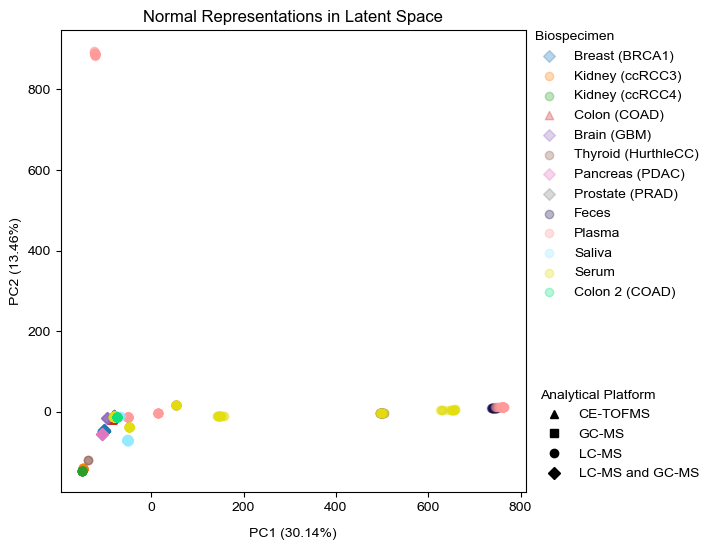

In [ ]:
from collections import Counter
# from umap import UMAP

pca_counter = Counter(np_raw_normal_lbls)
# means_and_reps = np.vstack((train_rep_final.z.detach().numpy(),dgd_final.gmm.means.detach().numpy()))
means_and_reps = np_normal_log

pca = PCA(n_components=2)
pca_fit = pca.fit_transform(means_and_reps)

# pca = UMAP(n_components=2)
# pca_fit = pca.fit_transform(means_and_reps)

fig, ax = plt.subplots(figsize=(6,6))

i = 0
j = 0
idx_fe = np.r_[224:257]
idx_pl = np.r_[257:654]
idx_sa = np.r_[654:843]
idx_se = np.r_[843:1153]
idx_ti = np.r_[1153:1192]
for c in cohorts_normal:
    k = pca_counter[c]
    j += k
    if ('plasma' not in c) and ('serum' not in c) and ('feces' not in c) and ('saliva' not in c) and ('tissue' not in c):
        ax.scatter(pca_fit[i:j,0], pca_fit[i:j,1], label=pca_labels[c], alpha=0.3, marker=pca_markers[c])
    i = j

ax.scatter(pca_fit[idx_fe,0], pca_fit[idx_fe,1], label='Feces'  , alpha=0.3, c="#17104B")
ax.scatter(pca_fit[idx_pl,0], pca_fit[idx_pl,1], label='Plasma' , alpha=0.3, c="#FF9B9B")
ax.scatter(pca_fit[idx_sa,0], pca_fit[idx_sa,1], label='Saliva' , alpha=0.3, c="#94EBFF")
ax.scatter(pca_fit[idx_se,0], pca_fit[idx_se,1], label='Serum'  , alpha=0.3, c="#e2de0f")
ax.scatter(pca_fit[idx_ti,0], pca_fit[idx_ti,1], label='Colon 2 (COAD)' , alpha=0.3, c="#0fe283")
ax.set_title('Normal Representations in Latent Space')



ap_handles = [
    plt.Line2D([],[], color='black', marker='^', linestyle='None', label='CE-TOFMS'),
    plt.Line2D([],[], color='black', marker='s', linestyle='None', label='GC-MS'),
    plt.Line2D([],[], color='black', marker='o', linestyle='None', label='LC-MS'),
    plt.Line2D([],[], color='black', marker='D', linestyle='None', label='LC-MS and GC-MS'),
]


ax.set_xlabel(f'PC1 ({(pca.explained_variance_ratio_[0] * 100):.2f}%)', labelpad=10)
ax.set_ylabel(f'PC2 ({(pca.explained_variance_ratio_[1] * 100):.2f}%)')
l1 = ax.legend(bbox_to_anchor=(1.40, 1.025),
               loc='upper right',
               fancybox=False,
               framealpha=0.0,
               title='Biospecimen',
               alignment='left'
               )
ax.add_artist(l1)

l2 = ax.legend(handles=ap_handles,
               bbox_to_anchor=(1.40, 0.25),
               loc='upper right',
               fancybox=False,
               framealpha=0.0,
               title='Analytical Platform',
               alignment='left')

### Tumor Representations and Means in Latent Space

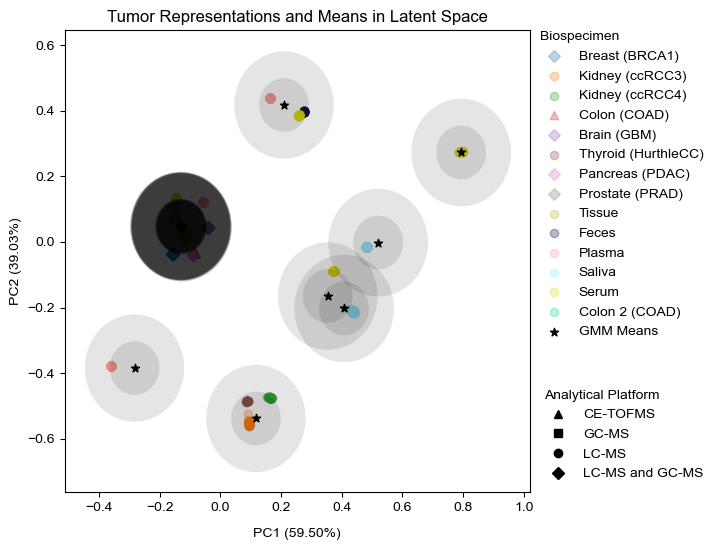

In [68]:
from collections import Counter

pca_counter = Counter(np_raw_tumor_lbls)
means_and_tumor_reps = np.vstack((tumor_rep_final, dgd_final.gmm.means.detach().numpy()))

pca_tumor = PCA(n_components=2)
pca_fit = pca_tumor.fit_transform(means_and_tumor_reps)

fig, ax = plt.subplots(figsize=(6,6))

i = 0
j = 0
idx_fe = np.r_[437:467]
idx_pl = np.r_[467:1306]
idx_sa = np.r_[1306:1629]
idx_se = np.r_[1629:2245]
idx_ti = np.r_[2245:2424]
for c in cohorts_tumor:
    k = pca_counter[c]
    j += k

    if ('plasma' not in c) and ('serum' not in c) and ('feces' not in c) and ('saliva' not in c):
        ax.scatter(pca_fit[i:j,0], pca_fit[i:j,1], label=pca_labels[c], alpha=0.3, marker=pca_markers[c])
    i = j

ax.scatter(pca_fit[idx_fe,0], pca_fit[idx_fe,1], label='Feces'  , alpha=0.3, c="#17104B")
ax.scatter(pca_fit[idx_pl,0], pca_fit[idx_pl,1], label='Plasma' , alpha=0.3, c="#FF9B9B")
ax.scatter(pca_fit[idx_sa,0], pca_fit[idx_sa,1], label='Saliva' , alpha=0.3, c="#94EBFF")
ax.scatter(pca_fit[idx_se,0], pca_fit[idx_se,1], label='Serum'  , alpha=0.3, c="#e2de0f")
ax.scatter(pca_fit[idx_ti,0], pca_fit[idx_ti,1], label='Colon 2 (COAD)' , alpha=0.3, c="#0fe283")

ax.scatter(pca_fit[2424:,0], pca_fit[2424:,1], label='GMM Means', c='black', marker='*')
ax.set_title('Tumor Representations and Means in Latent Space')

P = pca_tumor.components_
for x in range(0, dgd_final.gmm.n_comp):
    cov_2d = np.diag(torch.exp(dgd_final.gmm.log_var).detach().numpy()[x])
    # print(cov_2d)
    mean_2d = P @ (dgd_final.gmm.means.detach().numpy()[x] - pca_tumor.mean_)
    # mean_2d = pca_fit[175+x]
    cov_2d_projected = P @ cov_2d @ P.T

    vals, vecs = np.linalg.eigh(cov_2d_projected)
    order = vals.argsort()[::-1]
    vals, vecs = vals[order], vecs[:, order]
    angle = np.degrees(np.arctan2(vecs[1, 0], vecs[0, 0]))
    
    std = 1.0
    w, h = 2 * std * np.sqrt(vals)
    ellipse = Ellipse(xy=mean_2d, width=w, height=h, angle=angle,
                      facecolor='black', alpha=0.1)
    ax.add_patch(ellipse)

    std = 2.0
    w, h = 2 * std * np.sqrt(vals)
    ellipse_2 = Ellipse(xy=mean_2d, width=w, height=h, angle=angle,
                      facecolor='black', alpha=0.1)
    ax.add_patch(ellipse_2)


ap_handles = [
    plt.Line2D([],[], color='black', marker='^', linestyle='None', label='CE-TOFMS'),
    plt.Line2D([],[], color='black', marker='s', linestyle='None', label='GC-MS'),
    plt.Line2D([],[], color='black', marker='o', linestyle='None', label='LC-MS'),
    plt.Line2D([],[], color='black', marker='D', linestyle='None', label='LC-MS and GC-MS'),
]


ax.set_xlabel(f'PC1 ({(pca_tumor.explained_variance_ratio_[0] * 100):.2f}%)', labelpad=10)
ax.set_ylabel(f'PC2 ({(pca_tumor.explained_variance_ratio_[1] * 100):.2f}%)')
l1 = ax.legend(bbox_to_anchor=(1.40, 1.025),
               loc='upper right',
               fancybox=False,
               framealpha=0.0,
               title='Biospecimen',
               alignment='left')
ax.add_artist(l1)

l2 = ax.legend(handles=ap_handles,
               bbox_to_anchor=(1.40, 0.25),
               loc='upper right',
               fancybox=False,
               framealpha=0.0,
               title='Analytical Platform',
               alignment='left')

???

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import adjusted_rand_score, confusion_matrix
from scipy.optimize import linear_sum_assignment

le = LabelEncoder()
true_labels = le.fit_transform(train_all_loader.dataset.get_labels())
clustering  = torch.exp(dgd_model.gmm.get_log_prob_comp(train_rep.z.detach()))
pred_labels = torch.max(clustering, dim=-1).indices.cpu().detach().numpy()
cm_test = confusion_matrix(true_labels, pred_labels)
print(cm_test)
idxs = linear_sum_assignment(-cm_test + np.max(cm_test))
cm_test2 = cm_test[:, idxs[1]]

# print(cm_test2)
adjusted_rand_score(true_labels, pred_labels)

cm_copy = np.copy(cm)
bool_mask = ~np.all(cm_copy == 0, axis=1)
cm_copy = cm_copy[bool_mask]

cm_norm = np.round(np.nan_to_num(cm_copy / np.sum(cm_copy, axis=0) * 100), decimals=1)
# np.sum(cm, axis=0)

class_lbls = list(np.unique(np_normal_lbls))
# sample_num_lbls = [len(cohorts[c]['sample_list']) for c in cohorts.keys()]
# sample_num_lbls = [37,37,19,31,4,2,9,36]
sample_num_lbls = [47, 47, 24, 39, 6, 3, 12, 46, 33, 397, 189, 310, 39]
# sample_num_lbls = [47, 94, 118, 157, 169, 215]
# plt.rcParams["font.family"] = 'sans-serif'


zr_mask = np.where(cm_norm > 0, False, True)

fig, ax = plt.subplots(figsize=(8,6))

sns.heatmap(cm_norm, cmap='Blues',
            annot=True,
            fmt='g',
            xticklabels=np.sum(cm_copy, axis=0),
            yticklabels=class_lbls,
            linewidths=0.1,
            mask=zr_mask,
            linecolor='black',
            ax=ax,
            cbar_kws={
                'pad': 0.15,
                'shrink': 0.375,
                'aspect': 5,
                'anchor': (0.0, 1.0)
            })

ax_y = ax.twinx()
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
ax.tick_params(axis='both', length=0)

ax_y.set_yticks(ax.get_yticks())
ax_y.set_ylim(ax.get_ylim())
ax_y.set_yticklabels(sample_num_lbls)
ax_y.tick_params(axis='y', length=0)

ax.set_xlabel('Samples per component', fontsize=14, labelpad=15)
ax_y.set_ylabel('Samples per tissue' , fontsize=14, labelpad=30, rotation=270)

ax.tick_params(  axis='y', direction='out', pad=5)
ax_y.tick_params(axis='y', direction='out', pad=5)

ax.set_title('Gaussian Components', pad=15, fontsize=14)

# fig.subplots_adjust(bottom=0.5)
plt.tight_layout()